# Loading dependencies

In [1]:
import os
import re   # For regular expressions
# BeautifulSoup is used to parse the HTML
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Shashank\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Shashank\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [3]:
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.naive_bayes import MultinomialNB # naives biayes
from sklearn.ensemble import RandomForestClassifier # random forest
from sklearn.svm import SVC # support vector classifier
from sklearn.neighbors import KNeighborsClassifier # k nearest neighbors

# using accuracy, precision, and f1-score as our evaluation metrics
from sklearn.metrics import accuracy_score,precision_score,f1_score,confusion_matrix

## Loading Dataset

In [4]:
reviews_train = pd.read_csv('data/X_train.csv')
sentiment_train = pd.read_csv('data/y_train.csv')

In [5]:
# concatenate the two dataframes
df = pd.concat([reviews_train,sentiment_train],axis=1)

In [6]:
print("Shape of Dataset: ",df.shape)

# # taking random 40% of the data for training
# df = df.sample(0000, random_state=4)

#removing the index column from the dataframe
df.reset_index(inplace=True,drop=True)

df.head()

Shape of Dataset:  (40000, 2)


,review,sentiment
0,"Despite some moments in heavy rain, an encount...",negative
1,"A fabulous film,which I have now watched sever...",positive
2,"""Creepshow 2"" is little more than a pale imita...",negative
3,A pretty worthless made for television movie t...,negative
4,I think I read this someplace: Joe Johnston (d...,positive


<AxesSubplot:xlabel='sentiment', ylabel='count'>

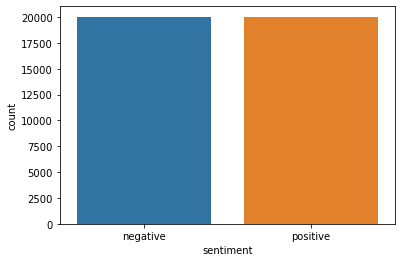

In [7]:
sns.countplot(x='sentiment',data=df)
# we see we have reviews in equal numbers i.e 25000 positive and 25000 negative reviews

In [8]:
df['review'][0]
# data have html tags in them, so we need to remove them

'Despite some moments in heavy rain, an encounter with a drunk as well as an organ grinder with a gypsy and a monkey, and a stay in a sanitarium, this Roscoe "Fatty" Arbuckle silent comedy short with support from Buster Keaton and Al St. John is only fitfully amusing though there is a quite funny sequence of Arbuckle in drag flirting with Buster that\'s the ultimate in "meet cute" scenes especially since it\'s one of the few times we see The Great Stone Face smile and laugh in the movies! Also, many scenes seem to have been jump cut edited possibly because of overuse of the film stock. Still, if you\'re an Arbuckle or Keaton completist, Good Night, Nurse! is certainly worth a look.'

# Data Cleaning & Preprocessing

In [9]:
def review_to_word(review, remove_stopwords=False):
    # Function to convert raw review to string of words,
    # optionally removing stop words.  
    # Returns string of words.
    #
    # 1. Remove HTML
    review_text = BeautifulSoup(review).get_text()
    #  
    # 2. Remove non-letters (all punctuation, and all whitespace)
    review_text = re.sub("[^a-zA-Z]"," ", review_text)
    #
    # 3. Convert words to lower case and split them
    words = review_text.lower().split()
    #
    # 4. Optionally remove stop words (false by default)
    if remove_stopwords:
        stops = set(stopwords.words("english"))
        words = [w for w in words if not w in stops]
    #
    # 5. Return a string of words
    return(" ".join(words))


# without stopwords
clean_review = review_to_word(df['review'][0])
print(clean_review)

despite some moments in heavy rain an encounter with a drunk as well as an organ grinder with a gypsy and a monkey and a stay in a sanitarium this roscoe fatty arbuckle silent comedy short with support from buster keaton and al st john is only fitfully amusing though there is a quite funny sequence of arbuckle in drag flirting with buster that s the ultimate in meet cute scenes especially since it s one of the few times we see the great stone face smile and laugh in the movies also many scenes seem to have been jump cut edited possibly because of overuse of the film stock still if you re an arbuckle or keaton completist good night nurse is certainly worth a look


In [10]:
# with stopwords
clean_review = review_to_word(df['review'][0], remove_stopwords=True)
print(clean_review)

despite moments heavy rain encounter drunk well organ grinder gypsy monkey stay sanitarium roscoe fatty arbuckle silent comedy short support buster keaton al st john fitfully amusing though quite funny sequence arbuckle drag flirting buster ultimate meet cute scenes especially since one times see great stone face smile laugh movies also many scenes seem jump cut edited possibly overuse film stock still arbuckle keaton completist good night nurse certainly worth look


In [11]:
# get number of reviews 
num_reviews = df.shape[0]

#Initialize an empty list to hold the clean reviews
clean_train_reviews = []

# looping over each review 
for i in range(0, num_reviews):
    # give a progress bar
    if((i+1)%5000 == 0):
        print("Review %d of %d" % (i+1, num_reviews))
    
    # Call our function for each one, and add the result to the list of clean reviews
    clean_train_reviews.append(review_to_word(df['review'][i], remove_stopwords=True))


Review 5000 of 40000
Review 10000 of 40000
Review 15000 of 40000
Review 20000 of 40000
Review 25000 of 40000
Review 30000 of 40000
Review 35000 of 40000
Review 40000 of 40000


In [12]:
lm = WordNetLemmatizer()

In [13]:
def text_transformation(reviews):
    corpus = []
    count = 0
    for review in reviews:
        count+=1
        if(count%500 == 0):
            print(" %d done " % count)
        n_review = review.split(' ')
        n_review = [lm.lemmatize(word) for word in n_review if word not in set(stopwords.words('english'))]
        corpus.append(" ".join(n_review))
    return corpus

# corpus = text_transformation(clean_train_reviews)
import pickle
# pickle.dump(corpus, open('corpus.sav',"wb"))
# loading pre transformed corpus
corpus = pickle.load(open('corpus.sav', 'rb'))
corpus[0]

'despite moment heavy rain encounter drunk well organ grinder gypsy monkey stay sanitarium roscoe fatty arbuckle silent comedy short support buster keaton al st john fitfully amusing though quite funny sequence arbuckle drag flirting buster ultimate meet cute scene especially since one time see great stone face smile laugh movie also many scene seem jump cut edited possibly overuse film stock still arbuckle keaton completist good night nurse certainly worth look'

In [14]:
clean_train_reviews[0]
# since using corpus doesnt make much of difference, we will use clean_train_reviews

'despite moments heavy rain encounter drunk well organ grinder gypsy monkey stay sanitarium roscoe fatty arbuckle silent comedy short support buster keaton al st john fitfully amusing though quite funny sequence arbuckle drag flirting buster ultimate meet cute scenes especially since one times see great stone face smile laugh movies also many scenes seem jump cut edited possibly overuse film stock still arbuckle keaton completist good night nurse certainly worth look'

In [15]:
# creating bag of words model
print("Creating the bag of words..\n")

from sklearn.feature_extraction.text import CountVectorizer

# Initialize the "CountVectorizer" object, which is scikit-learn's bag of words tool.

vectorizer = CountVectorizer(stop_words = None,
                            max_features = 15000,
                            ngram_range=(1,1))

# max_features is the number of words to consider
# without : MemoryError: Unable to allocate 3.12 TiB

train_data_features = vectorizer.fit_transform(clean_train_reviews)

train_data_features = train_data_features.toarray()

Creating the bag of words..



In [16]:
print("Data Features : ",train_data_features.shape)

Data Features :  (40000, 15000)


In [17]:
# looking into the bag of words/features

# import random
from random import sample

vocab = vectorizer.get_feature_names()
print(sample(vocab, 10))

['mafia', 'greenwich', 'wronged', 'rancid', 'decoration', 'desmond', 'adrian', 'lamest', 'axel', 'chucky']


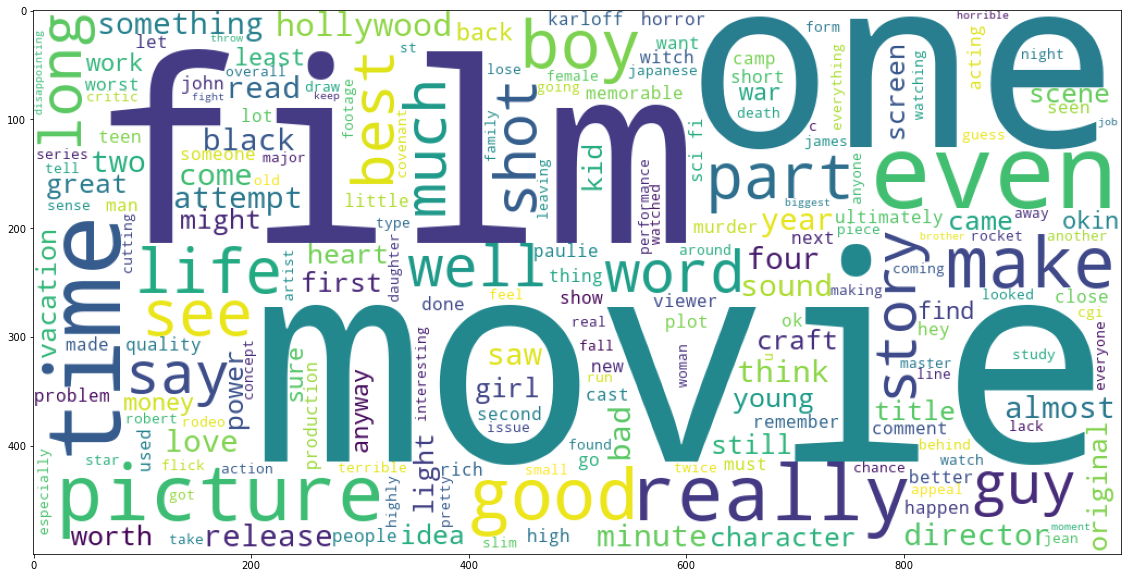

In [18]:
from wordcloud import WordCloud
from matplotlib.pyplot import imshow, figure
figure(figsize=(20,10))
word_cloud = ""
for row in corpus[4:24]:
    for word in row:
        word_cloud+=" ".join(word)
wordcloud = WordCloud(width = 1000, height = 500,background_color ='white',min_font_size = 10).generate(word_cloud)
imshow(wordcloud)

In [19]:
from sklearn.preprocessing import LabelEncoder

df['sentiment'] = LabelEncoder().fit_transform(df['sentiment'])

# 0 = negative, 1 = positive

## Tranforming test data

In [20]:
# Loading test data
reviews_test = pd.read_csv('data/X_test.csv',index_col=False)
sentiment_test = pd.read_csv('data/y_test.csv',index_col=False)

# Clean test reviews
num_reviews = reviews_test.shape[0]
clean_test_reviews = []
for i in range(0, num_reviews):
    # give a progress bar
    if((i+1)%5000 == 0):
        print("Review %d of %d" % (i+1, num_reviews))
    
    # Call our function for each one, and add the result to the list of clean reviews
    clean_test_reviews.append(review_to_word(reviews_test['review'][i],remove_stopwords=True))

sentiment_test['sentiment'] = [ 1 if x=='positive' else 0 for x in sentiment_test['sentiment']]

test_reviews = vectorizer.transform(clean_test_reviews)
test_reviews = test_reviews.toarray()


Review 5000 of 10000
Review 10000 of 10000


In [21]:
sentiment_test = sentiment_test.sample(4000, random_state=4)
test_reviews = test_reviews[sentiment_test.index]

# Classification using different classifiers


In [22]:
# 1. Naive Bayes
print("Naive Bayes")

# Initialize MultinoialNB
MultiNB = MultinomialNB()
# Fit the MultiNB model to the training data, using 
# bag of words as features and sentiment labels as response variable
MultiNB.fit(train_data_features, df['sentiment'])

# Predict the sentiment labels for test data
predictions = MultiNB.predict(test_reviews)

accu = accuracy_score(sentiment_test.sentiment, predictions)*100
pre_score = precision_score(sentiment_test.sentiment, predictions)
f_score = f1_score(sentiment_test['sentiment'], predictions)
print("Accuracy : %f " % accu)
print("Precision Score : ",pre_score)
print("F1 Score : ", f_score)

print("confusion matrix : \n",confusion_matrix(sentiment_test.sentiment, predictions))

Naive Bayes
Accuracy : 84.375000 
Precision Score :  0.857069933639612
F1 Score :  0.8430831031885514
confusion matrix : 
 [[1696  280]
 [ 345 1679]]


In [23]:
# 2. Random Forest
print("Random Forest")

# Initialize Random Forest Classifier
forest = RandomForestClassifier(n_estimators = 100, random_state=4, min_samples_split=100)

# Fit the forest to the training set, using the bag of words as
# features and sentiment as the response variable
forest = forest.fit(train_data_features, df['sentiment'])

predictions = forest.predict(test_reviews)

accu = accuracy_score(sentiment_test.sentiment, predictions)*100
pre_score = precision_score(sentiment_test.sentiment, predictions)
f_score = f1_score(sentiment_test['sentiment'], predictions)
print("Accuracy : %f " % accu)
print("Precision Score : ",pre_score)
print("F1 Score : ", f_score)

print("confusion matrix : \n",confusion_matrix(sentiment_test.sentiment, predictions))

Random Forest
Accuracy : 84.950000 
Precision Score :  0.8505917159763313
F1 Score :  0.851431391905232
confusion matrix : 
 [[1673  303]
 [ 299 1725]]


In [24]:
# 3. Support Vector Machine
print("Support Vector Machine")

# Initialize SVM
SVM = SVC(kernel='linear', C=1, gamma='auto')
# Fit the SVM model to the training data
SupportVecClass = SVM.fit(train_data_features[1:1000], df['sentiment'][1:1000])

predictions = SupportVecClass.predict(test_reviews[1:10000])

print("Accuracy : ",accuracy_score(sentiment_test.sentiment[1:10000], predictions))
print("Precision Score",precision_score(sentiment_test.sentiment[1:10000], predictions))
print("F1 Score",f1_score(sentiment_test['sentiment'][1:10000], predictions))

print("confusion matrix : \n",confusion_matrix(sentiment_test.sentiment[1:10000], predictions))

Support Vector Machine
Accuracy :  0.7636909227306826
Precision Score 0.7715148465022648
F1 Score 0.7643979057591623
confusion matrix : 
 [[1521  454]
 [ 491 1533]]


In [25]:
# 4. K Nearest Neighbors
print("K Nearest Neighbors")

# Initialize KNN
knn = KNeighborsClassifier()

# Fit the KNN model to the training data
KNearestNeighbor = knn.fit(train_data_features, df['sentiment'])

predictions = KNearestNeighbor.predict(test_reviews)

accu = accuracy_score(sentiment_test.sentiment, predictions)*100
pre_score = precision_score(sentiment_test.sentiment, predictions)
f_score = f1_score(sentiment_test['sentiment'], predictions)
print("Accuracy : %f " % accu)
print("Precision Score : ",pre_score)
print("F1 Score : ", f_score)

print("confusion matrix : \n",confusion_matrix(sentiment_test.sentiment, predictions))

K Nearest Neighbors
Accuracy : 61.325000 
Precision Score :  0.6311159978009896
F1 Score :  0.5974499089253188
confusion matrix : 
 [[1305  671]
 [ 876 1148]]


# Results

| Classifer | Accuracy | Precision | F1-score |
| ------ | --- | --- | --- |
| NB (Naive Baiyes)             | 84.400000 | 0.8524672 | 0.8443890 |
| RF (Random Forest)            | 84.725000 | 0.8421307 | 0.8505747 |
| SVM (Support Vector Machine)  | 76.719176 | 0.7747611 | 0.7680039 |
| KNN (K-Nearest Neighbors)     | 61.050000 | 0.6214807 | 0.6047691 |


### Random Forest got best accuracy (84.72 %) in comparison to other classifiers, Further it got highest f1 score of 0.85

## Custom Test : Testing review on best performing classifier (RF)

In [55]:
# Loading test data
reviews_test = pd.read_csv('data/X_test.csv',index_col=False)
sentiment_test = pd.read_csv('data/y_test.csv',index_col=False)

# Clean test reviews
clean_test_reviews = []
# review
clean_test_reviews.append(review_to_word(reviews_test['review'][6],remove_stopwords=True))

sentiment_test['sentiment'] = [ 1 if x=='positive' else 0 for x in sentiment_test['sentiment']]

test_review = vectorizer.transform(clean_test_reviews)
test_review = test_review.toarray()

In [56]:
reviews_test['review'][6]

"Just kidding, I rented 12 Monkeys the other day because I am a huge Bruce Willis fan and I heard some things about the film. Some good and some bad, but it was one of those films you had to pay attention to every second, so I was a bit worried. Just because I felt like for a minute if this was going to be one of those films that I had to watch several times to get. But I watched it last night and I was really impressed, this movie had everything in it: action, drama, sci-fi, history, dark humor, and even a little romance. The actors all did a terrific job, I give a lot of credit to Bruce, during his scene in the car with his psychiatrist, he really got to me. But Brad Pitt, I'm just amazed with how much of a great job he did. He didn't over do his character, who was crazy, and just made it work and was extremely believable. The story was just scary, but very good and a wake up call.<br /><br />James Cole is a man in the future where a virus broke out in the past and killed 5 billion p

In [61]:

tags = ["negative","positive"]

prediction = forest.predict(test_review)
print("Review is",tags[prediction[0]])

Review is positive
